# PyTorch: classification에서의 Output Func와 Loss Func

* 최종 출력- activation functions
: Sigmoid, Softmax, LogSoftmax

* Loss function: BCELoss,BCEWithLogitsLoss, CrossEntropyLoss, NLLLoss

## 활성화 함수


### 1. sigmoid
:logit 입력0과 1사이 pobability값으로 변환


In [ ]:
import torch
# import torch.nn.functional as F->functional module

# 원시 출력값 (logits)
logits = torch.tensor([2.0, -1.0, 0.5])

# Sigmoid 적용
sigmoid_outputs = torch.sigmoid(logits)

# Print Output
torch.set_printoptions(precision=2) #소수점 둘째자리까지 출력
print('Sigmoid outputs:', sigmoid_outputs)

Sigmoid outputs: tensor([0.88, 0.27, 0.62])


In [ ]:
type(torch.sigmoid)

builtin_function_or_method

### 2. softmax(시그모이드의 일반형)
: class에 해당하는 logit score로 구성된 vector를 입력, 각각 속할 probability를 요소로 가지는 vector
* 모든 요소의 값을 더하면 1.0이 됨.

* **mutually** exclusive로 class가 결정되는 경우의 최종 출력 vector 구하는데 사용



In [ ]:
import torch
import torch.nn.functional as F

#원시 출력값(logits)
logits = torch.tensor([2.0, 1.0, 0.1])

#softmax적용
softmax_outputs = F.softmax(logits, dim=-1) #-1을 권함(마지막 정보), 0은 문제가 발생할 수 있음
print(f'{softmax_outputs=}')

softmax_outputs=tensor([0.66, 0.24, 0.10])


* torch.nn.functional: PyTorch에서 다양한 신경망 연산 및 함수들을 제공하는 module.

* 신경망의 여러 layers, activation functionis, loss functions 등을 Functional API로 제공.

* Class의 인스턴스로 만드는 경우보다 보다 쉽고 독립적으로 사용가능하다는 장점-> 주로 학습되는 weight이 없는 함수들의 사용에 많이 사용되는 방식

*class를 이용하여 softmax 사용*

In [ ]:
import torch
# Softmax 모듈 초기화 (dim=-1은 텐서의 마지막 차원을 기준으로 softmax를 적용)
softmax = torch.nn.Softmax(dim=-1)

# 원시 출력값 (logits)
logits = torch.tensor([2.0, 1.0, 0.1])

# Softmax 적용.
softmax_outputs = softmax(logits)
print(f'{softmax_outputs=}')

softmax_outputs=tensor([0.66, 0.24, 0.10])


### 3. LogSoftmax
: softmax의 출력에 로그 적용
* softmax로 얻어진 확률분포에 해당하는 vector를 일종의 likelihood로 생각
* 모델이 정답인 class의 likelihood를 극대화하도록 최적화할 때 사용되는 loss 함수인
* negative log likelihood (NLL) loss 와 함께 사용되게 하기 위해  
* softmax결과에 log를 취한 결과가 나오도록 한 함수.

*softmax에 log를 취하는 형태의 구현은 0에 가까운 값을 가질 때, 수치해석적 구현에 문제가 발생하기 쉽기 때문에*

이를 고려하여 stable하게 동작하도록 구현한 LogSofmax를 PyTorch가 제공

거의 대부분의 경우, 손실함수  **NLLLoss** 와 함께 사용


In [ ]:
# LogSoftmax 적용
log_softmax_outputs = F.log_softmax(logits, dim=0)
print('LogSoftmax outputs:', log_softmax_outputs)

LogSoftmax outputs: tensor([-0.42, -1.42, -2.32])


## 손실함수(Loss Functions)

- 모델의 성능을 하나의 scalar값으로 나타냄
- loss function이 클수록 예측치는 label과 차이가 큼
=> 모델의 parameters가 아직 최적의 값과 거리가 큼 의미

### 1. BCELoss (Binary Cross Entropy Loss)


- binary classification에 사용되는 loss func.
-  model의 출력과 타겟 라벨이 모두 0과 1 사이의 값
=> 모델의 출력은 Sigmoid
  - pred: Sigmoid (logistic function)를 통과한 probability 값.
  - label: 0과 1 사이의 실제 라벨 값 (0과 1만 선택한다해도, float tensor여야 함.)

In [ ]:
import torch.nn as nn

# 예측값과 실제값
outputs = torch.tensor([0.7, 0.2, 0.9], requires_grad=True)#.float() # 가상의 tensor를 사용하여 값이 나오는지 확인함
#70%, 20% 90%
targets = torch.tensor([1.0, 0.0, 0.0]).float()#float로 들어가야함,int는 안됨 # 가상의 tensor를 사용하여 값이 나오는지 확인함
#정확히 맞춤을 의미

# BCELoss 선언
criterion = nn.BCELoss()

# 시그모이드 활성화 적용
outputs = torch.sigmoid(outputs)

# 손실 계산
loss = criterion(outputs, targets)
print(f'{outputs=}')
print('BCELoss:', loss.item())

outputs=tensor([0.67, 0.55, 0.71], grad_fn=<SigmoidBackward0>)
BCELoss: 0.8141595721244812


### 2. BCE With Logits Loss

- BCELoss의 variation, Binary Classification.
- 내부적으로 sigmoid 함수를 결합시켜놓았기 때문에, 입력으로 logit score를 받을 수 있음

 - pred: Sigmoid Activation Function의 입력값인 logit score.
 - label: 0과 1 사이의 실제 라벨 값

In [ ]:
import torch
import torch.nn as nn

# 원시 출력값 (시그모이드 활성화 적용 전 raw score)
raw_outputs = torch.tensor([0.5, -1.0, 2.0], requires_grad=True)
targets = torch.tensor([1.0, 0.0, 1.0])

# BCEWithLogitsLoss 선언
criterion = nn.BCEWithLogitsLoss()

# 손실 계산 (시그모이드 내부 적용)
loss = criterion(raw_outputs, targets)
print(f'BCEWithLogitsLoss: {loss.item():.4f}')

BCEWithLogitsLoss: 0.3048


### 3. CrossEntropyLoss


- multi-class classification에 사용

***주의**
- PyTorch의CrossEntropyLoss는 내부적으로 Softmax 함수를 적용하고 있어서, **logit score vector** 를 입력

 - 입력: softmax activation 안 거친 ANN의 raw score.
 - 출력: 클래스 인덱스 (예: 0, 1, 2, ...) : long (=int64)를 dtype로 가짐.

In [ ]:
import torch
import torch.nn as nn

# 원시 출력값 (softmax 활성화 적용 전)
raw_outputs = torch.tensor(
	[[1.0, 2.0, 3.0],
         [1.0, 2.0, 0.0],
         [0.0, 2.0, 1.0]],
        requires_grad=True).float()
targets = torch.tensor([2, 0, 1]).long()# 1행2열, 2행 0열, 3행1열이 가장큼, # 각 샘플의 클래스 인덱스
#.long: 정수로 저장
print(targets.dtype)

# CrossEntropyLoss 선언
criterion = nn.CrossEntropyLoss()

# 손실 계산 (softmax 내부 적용)
loss = criterion(raw_outputs, targets)
print(f'CrossEntropyLoss: {loss.item():.2f}')

torch.int64
CrossEntropyLoss: 0.74


### 3. NLLLoss (Negative Log Likelihood Loss)

- crossentropy와 유사
- **로그 확률을 입력**으로 사용, LogSoftmax와 함께 사용
 - 실제로는 negation과 mean (또는 sum)만의 처리만 이루어짐.
 - softmax와 log는 LogSoftmax에서 이루어짐.

- **입력: 로그 확률** (LogSoftmax의 출력)
- 출력: 클래스 인덱스 (예: 0, 1, 2, ...)

In [ ]:
import torch
import torch.nn

# 모델 출력
logits = torch.tensor(
	[[0.1, 0.2, 0.7], # max idx 2
     	 [0.8, 0.1, 0.1], # max idx 0
     	 [0.3, 0.5, 0.2]], # max idx 1
    	requires_grad=True).float()

# 타겟 클래스 인덱스
targets = torch.tensor([2, 0, 1]).long()

# 로그 소프트맥스 적용
log_softmax = F.log_softmax(logits, dim=-1)# 마지막이라는 뜻에서 dim= -1이라 둠

# NLLLoss 선언
criterion = nn.NLLLoss()
loss = criterion(log_softmax, targets)
print(f'NLLLoss with LogSoftmax: {loss.item():.2f}')

NLLLoss with LogSoftmax: 0.80


## 결론



- Binary Classification:
 - BCELoss 또는 BCEWithLogitsLoss 사용.

- Multiple-class Classification:
 - CrossEntropyLoss 또는 LogSoftmax와 NLLLoss의 조합을 사용

- Activation Function:
 - Sigmoid는 binary classification(이진 분류)에서,
 - Softmax는 mutiple-class classification(다중 클래스)의 확률을 직접 계산
 - LogSoftmax는 확률의 로그 값을 계산
 =>수치적으로 stable(안정적)인 결과를 제공.

2번째 정리

# Dataset: Wisconsin Breast Cancer Dataset

- Wisconsin Breast Cancer Dataset (WBCD)
: 오늘날 Machine Learning 및 Data Science 분야에서 binary classification 교육용으로 자주 사용되는 Dataset

 - Wisconsin 대학의 병리학자인 Dr. William H. Wolberg가 수집한 dataset
  -  scikit learn 등에서 기본 dataset으로 구할 수 있기 때문에 굳이 위의 사이트를 사용할 필요 x.

 ## 특징

- 해당 Dataset은 Breast Cancer Cell Sample에 대한 세포핵의 특성을 기반으로 구성

  - input vector들은 각 셀 핵의 크기, 모양, 질감 등 다양한 측정 값($10\times 3$)을 포함하고 있음.

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(type(cancer))
dir(cancer)

<class 'sklearn.utils._bunch.Bunch'>


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

### Exploratory Data Analysis (EDA)

- 탐색적 데이터 분석-> df를 이용

In [ ]:
from IPython import display
display.Markdown(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

- Pandas의 DataFrame의 인스턴스로 쉽게 변환

In [ ]:
import pandas as pd

# input feature vector를 DataFrame 인스턴스로 # target column을 추가.
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['label'] = cancer.target

df. head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.describe() # 각각의 통계치 살펴봄, 문자열일경우 빠짐

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df.info() #빠진데이터, 데이터 형태 보여줌

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

- 마지막 라벨 값 int 64

In [ ]:
df['label'].value_counts() # unique한 값이 몇종류 있는지 볼 때 쓰임

label
1    357
0    212
Name: count, dtype: int64

In [ ]:
import numpy as np
np.unique(cancer.target_names) # 0: benign(양성), 1: malignant(악성)

array(['benign', 'malignant'], dtype='<U9')

## Data Processing

In [ ]:
x_raw = cancer.data
y_raw = cancer.target

print(f'{type(x_raw)=}:{x_raw.shape=}')
print(f'{type(y_raw)=}:{y_raw.shape=}')

type(x_raw)=<class 'numpy.ndarray'>:x_raw.shape=(569, 30)
type(y_raw)=<class 'numpy.ndarray'>:y_raw.shape=(569,)


In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_raw, y_raw, test_size = .1,
    stratify=y_raw, #지난 시간과 코드- 모집단과 분포를 맞춰서 샘플링 여기선 y_raw로 맞춰줌(ex:나이 비율 맞춰 통계)
)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size = .1,
    stratify=y_train,
)

print(f'{len(x_train)=}\n  {len(x_val)=}\n {len(x_test)=}') # train+val 90프로 정도


len(x_train)=460
  len(x_val)=52
 len(x_test)=57


In [ ]:
import numpy as np

test_r  = np.unique(y_test , return_counts = True)
train_r = np.unique(y_train, return_counts = True)
val_r   = np.unique(y_val,   return_counts = True)

print("test's cancer ratio : ", np.round( test_r[1][1]/np.sum( test_r[1]),2))
print("train's cancer ratio: ", np.round(train_r[1][1]/np.sum(train_r[1]),2))
print("val's cancer ratio. : ", np.round(  val_r[1][1]/np.sum(  val_r[1]),2))

test's cancer ratio :  0.63
train's cancer ratio:  0.63
val's cancer ratio. :  0.63


In [ ]:
print(f'{x_train.shape=}\n{  x_val.shape= }\n {x_test.shape= }')

x_train.shape=(460, 30)
  x_val.shape= (52, 30)
 x_test.shape= (57, 30)


## Dataset and DataLoader

In [ ]:
from torch.utils.data import Dataset
import torch
import torch.nn as nn

class BCDataset (Dataset):

  def __init__(self, r_vec, r_label):
    self.data = torch.tensor(r_vec).float() # tensor로 바꿔주는 것이 중요, float: 바이너리 classofication이여서 바꿔줌
    self.label = torch.tensor(r_label).float().unsqueeze(1)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx],self.label[idx]

train_ds = BCDataset(x_train,y_train)
val_ds = BCDataset(x_val, y_val)
test_ds = BCDataset(x_test, y_test)

In [ ]:
next(iter(train_ds)) # dataset은 iterable하므로 iter 사용해 뽑아냄

(tensor([1.15e+01, 1.82e+01, 7.36e+01, 4.03e+02, 8.85e-02, 7.69e-02, 3.34e-02,
         1.50e-02, 1.41e-01, 6.24e-02, 3.28e-01, 1.06e+00, 2.47e+00, 2.29e+01,
         6.65e-03, 2.65e-02, 2.22e-02, 7.81e-03, 1.89e-02, 3.41e-03, 1.27e+01,
         2.16e+01, 8.27e+01, 4.90e+02, 1.14e-01, 1.79e-01, 1.23e-01, 5.51e-02,
         2.21e-01, 7.64e-02]),
 tensor([1.]))

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(
    dataset = train_ds,
    batch_size = 32,
    shuffle = True,
)

valid_loader = DataLoader(
    dataset = val_ds,
    batch_size = 32,
    shuffle = True,
)
test_loader = DataLoader(
    dataset = test_ds,
    batch_size = 32,
    shuffle = False,
)



## Training Loop Implementation

In [ ]:
from tqdm import tqdm #진행 상항을 시각적으로 보여주는 라이브러리

def train_loop (
    n_epoch,
    train_ds, val_ds,
    model, optimizer, loss_fnc,
    device = 'cpu',):

  log_hist = torch.zeros([0,3]).to(device)# 학습 및 검증 손실 기록

 # 에포크 루프
  for epoch in tqdm(range(n_epoch)):
    # print(f'\r{epoch:6>}', end='')

    model = model.to(device) #에포크마다 모델을 지정된 device로 이동시킴
    model.train() # train()모드로 설정

# 학습 데이터 셋 루프
    for x_tensor, y_tensor in train_ds: #학습 데이터 셋(train_ds)에서 배치단위로 데이터 로드

      x_tensor.to(device)
      y_tensor.to(device)

      y_pred = model(x_tensor) # 모델에 입력데이터(x_tensor)를 공급, 예측값(y_tensor) 계산
      loss_train = loss_fnc(y_pred, y_tensor)

      if torch.isinf(loss_train): # 손실값이 무한대인 경우
        print(f'Error: loss is infinity!')
        break

      optimizer.zero_grad()
      loss_train.backward()#역전파 통해 기울기 계산
      optimizer.step()# 가중치 업데이트

#검증 데이터 셋 루프
    with torch.no_grad(): #검증 과정에서 기울기 계산 비활성화
      for x_tensor, y_tensor in val_ds: #검증데이터셋(val_ds)에서 배치단위로 데이터 로드
        x_tensor = x_tensor.to(device)
        y_tensor = y_tensor.to(device)
        model.eval() #eval모드로 설정
        pred = model(x_tensor) # 예측값 계산
        loss_val = loss_fnc(pred, y_tensor)# 검증 손실(loss_val)계산


    if epoch % 100 == 0:
      tmp = torch.tensor([epoch, loss_train.item(), loss_val.item()]).to(log_hist.device)
      # print(tmp)
      log_hist = torch.concat( (log_hist, tmp.reshape(1,-1)), dim=0 )
      print(f' Epoch / loss {loss_train.item():.4f} / val_loss {loss_val.item():.4f}')

    if epoch == n_epoch:
      print(f' Epoch / loss {loss_train.item():.4f} / val_loss {loss_val.item():.4f}')

  return model,log_hist


##  Model Implementation

In [ ]:
class SimpleModel(nn.Module):

  def __init__(self, n_feature): #클래스의 초기화 메서드
    super().__init__()# 부모 클래스인 nn.Module의 초기화 메서드 호출하여
                           # nn.Module의 모든 속성, 메서드 상속받도록 함
                           # n_feature: 입력 특성 수를 나타냄
# 신경망 층 정의
    self.l0 = nn.Linear(n_feature, 16) #(입력, 출력)
    self.a0 = nn.ReLU()
    self.l1 = nn.Linear(16,16)
    self.a1 = nn.ReLU()
    self.lf = nn.Linear(16,1)
    self.out = nn.Sigmoid() # 추가된 부분- sigmoid: 출력값을 0과 1사이로 변환,
                                          # 이진 분류 문제에서 확률 값으로 사용
# 순전파 정의-입력데이터 x가 모델을 통과하면서 어떻게 변환되는지 설명
  def forward(self, x):
    x = self.l0(x) # 입력데이터 x가 첫번째 선형 계층 l0통과
    x = self.a0(x) # 선형 계층의 출력을 첫번째 ReLU 활성화 함수 a0에 입력, 비선형성 추가
    x = self.l1(x) # 활성화 함수의 출력을 두번째 선형 계층에 입력
    x = self.a1(x) # 두번째 선형 계층의 출력을 두번째 활성화 함수에 입력
    x = self.lf(x) # 활성화 함수의 출력을 마지막 선형계층에 입력
    x = self.out(x) # 추가된 부분- 마지막 선형 계층 출력을 Sigmoid활성화 함수에 입력,
    #출력값을 0에서 1사이로 반환

    return x

### Test Model

In [ ]:
# input vector의 number of components확인.
n_features = x_raw.shape[-1] # x_raw: 원본 입력 데이터로 가정,
                             # 입력데이터의 마지막 차원의 크기 가져옴
                             #이는 입력 벡터의 특성 수 의미
print(f'{n_features    =}')

# random한 input vector 5개에 대한
# 모델의 예측 결과를 확인하여
# 모델의 i/o 의 shape 확인.
model = SimpleModel(n_features) #입력 특성 수를 n_feature로 설정, SimlpleModel생성
                                #모델의 첫번째 선형 계층이 입력 벡터의 크기를 알 수 있도록 함
x = torch.randn( (5, n_features) ) # 5->배치 크기, n_features->특성 수
print(f'{x.shape       =}')
print(f'{model(x).shape=}')# x를 모델에 통과시킨 결과 출력


n_features    =30
x.shape       =torch.Size([5, 30])
model(x).shape=torch.Size([5, 1])


## Training

In [ ]:
# device 설정.
device = (
      "cuda" if torch.cuda.is_available()
      else "mps"
      if torch.backends.mps.is_available()
      else "cpu"
  )
#device는 모델이 사용할 장치를 설정.
#GPU를 사용할 수 있으면 "cuda",
#Apple Silicon의 Metal Performance Shaders(MPS)를 사용할 수 있으면 "mps",
#그렇지 않으면 "cpu"를 사용.
print(f"{device=}")


device='cpu'


In [ ]:

# number of epochs
n_epoch = 1000
# learning ratio
lr = 1e-4 # 0.0001로 설정

# loss function 설정
loss_fnc  = nn.BCELoss()# sigmoid 형태이므로 이렇게 작성
#이진 교차 엔트로피 손실(Binary Cross Entropy Loss)로 설정-> 이진분류(0과 1사이값)
# 모델 생성 및 초기화
model = SimpleModel(n_features)
# optimizer 생성 및 초기화
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
#확률적 경사 하강법(SGD) 옵티마이저를 사용하여 모델의 파라미터를 업데이트

m, h = train_loop ( #m은 학습이 끝난 모델을, h는 학습 로그 또는 기록
    n_epoch,
    train_loader, valid_loader,
    model, optimizer, loss_fnc,
    device = device)

  1%|          | 9/1000 [00:00<00:22, 43.81it/s]

 Epoch / loss 1.3167 / val_loss 1.7262


 11%|█         | 107/1000 [00:02<00:24, 36.43it/s]

 Epoch / loss 0.2655 / val_loss 0.2158


 21%|██        | 206/1000 [00:05<00:17, 45.76it/s]

 Epoch / loss 0.0869 / val_loss 0.2243


 31%|███       | 310/1000 [00:07<00:13, 51.29it/s]

 Epoch / loss 0.2709 / val_loss 0.3472


 41%|████      | 406/1000 [00:10<00:14, 41.94it/s]

 Epoch / loss 0.2721 / val_loss 0.2083


 51%|█████     | 509/1000 [00:12<00:09, 51.09it/s]

 Epoch / loss 0.2633 / val_loss 0.2945


 61%|██████    | 609/1000 [00:14<00:07, 50.14it/s]

 Epoch / loss 0.1667 / val_loss 0.3665


 71%|███████   | 706/1000 [00:17<00:08, 32.73it/s]

 Epoch / loss 0.0232 / val_loss 0.1435


 81%|████████  | 810/1000 [00:19<00:03, 47.85it/s]

 Epoch / loss 0.1597 / val_loss 0.1537


 91%|█████████ | 909/1000 [00:21<00:01, 50.17it/s]

 Epoch / loss 0.0710 / val_loss 0.2430


100%|██████████| 1000/1000 [00:23<00:00, 42.44it/s]


## Learning Curve Check

In [ ]:
h #history : training loop

tensor([[0.00e+00, 1.32e+00, 1.73e+00],
        [1.00e+02, 2.65e-01, 2.16e-01],
        [2.00e+02, 8.69e-02, 2.24e-01],
        [3.00e+02, 2.71e-01, 3.47e-01],
        [4.00e+02, 2.72e-01, 2.08e-01],
        [5.00e+02, 2.63e-01, 2.94e-01],
        [6.00e+02, 1.67e-01, 3.67e-01],
        [7.00e+02, 2.32e-02, 1.44e-01],
        [8.00e+02, 1.60e-01, 1.54e-01],
        [9.00e+02, 7.10e-02, 2.43e-01]])

(10, 3)


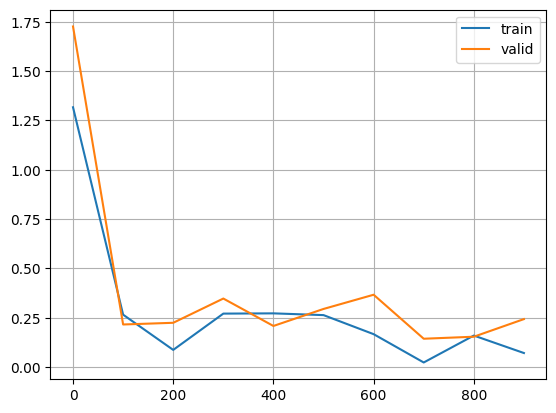

In [ ]:
import matplotlib.pyplot as plt

h0 = h.detach().numpy()
print(h0.shape)
plt.plot(h0[:,0], h0[:,1], label='train')
plt.plot(h0[:,0], h0[:,2], label='valid')
plt.legend()
plt.grid()
plt.show()


## Test

In [ ]:
f_m = model.cpu()
f_m.eval() # 학습이 되지 않으므로
#모델을 평가 모드로 전환

with torch.no_grad(): # no grad
  is_first = True # 처음 반복 여부를 확인
  for x_tensor, y_tensor in test_loader: #테스트 데이터 로더에서 배치(batch)를 반복
    x_tensor = x_tensor.cpu()
    y_tensor = y_tensor.cpu()
    pred = f_m(x_tensor) #모델을 사용하여 예측값을 생성

    # print(y_tensor.numpy().shape)
    if is_first:
      #test_pred_prob = pred.numpy().copy() 코드 오류 수정1
      test_pred_prob = pred.cpu().numpy().copy()
      test_label = y_tensor.cpu().numpy().copy()
      is_first = False #이후 배치에서는 이 초기화 코드가 실행되지 않도록 플래그 설정

    else: #첫 번째 배치 이후에는 test_label과 test_pred_prob에 새 데이터를 추가
      test_label = np.concatenate((test_label,y_tensor.cpu().numpy()), axis=0)
      #test_pred_prob = np.concatenate((test_pred_prob, pred.numpy()), axis=0)코드 오류 수정 2
      test_pred_prob = np.concatenate((test_pred_prob, pred.cpu().numpy()), axis=0)

print(test_label.shape, test_label.dtype)
print(test_pred_prob.shape, test_pred_prob.dtype)


# 여기서 틀린 부분 2개 찾아오기- 시험 문제 가산점
# 다시 짜보기
## 잘못된 부분은 pred를 NumPy 배열로 변환할 때 GPU에서 수행될 가능성을 배제하지 않은 점.
#pred와 y_tensor를 CPU로 이동시키지 않고 바로 NumPy 배열로 변환하려고 하면,
#만약 텐서가 GPU에 있다면 오류가 발생.
# pred와 y_tensor를 CPU로 이동시키고 나서 NumPy 배열로 변환

(57, 1) float32
(57, 1) float32


In [ ]:

from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    fbeta_score,
)
pred = np.round(test_pred_prob) #예측 확률(test_pred_prob)을 반올림하여 이진 클래스(0 또는 1)로 변환
label = test_label

#혼동 행렬 출력-실제 레이블(label)과 예측값(pred)을 비교
print('Confusion Matrix\n', # 맞은 것 확인.. 크로스 된 부분 (행이 실제데이터, 열이 예측값)
      str(confusion_matrix(label,pred))
      )
print(f'Precision:{precision_score(label,pred):.2f}') #정밀도: 예측된 양성 중 실제로 양성인 비율.
print(f'Recall.  :{recall_score(label,pred):.2f}') #재현율: 실제 양성 중 모델이 올바르게 예측한 비율.
print(f'F1-Score :{f1_score(label,pred):.2f}') # precision과 recall에 동일한 가중치 가짐
                                               #정밀도와 재현율의 균형을 평가.
print(f'F2-Score :{fbeta_score(label,pred,beta=2):.2f}') # recall에 더 가중치를 둠 (의료에서 사용)

In [ ]:
pred #test_pred_prob를 반올림하여 이진 클래스로 변환한 것,
# 모델의 예측값을 나타

tensor([[8.51e-01],
        [8.74e-01],
        [9.77e-01],
        [9.53e-01],
        [2.76e-07],
        [2.02e-07],
        [5.49e-03],
        [6.72e-03],
        [7.18e-08],
        [1.15e-05],
        [9.76e-01],
        [9.77e-01],
        [9.52e-01],
        [9.87e-01],
        [9.60e-01],
        [8.37e-07],
        [1.30e-05],
        [9.59e-01],
        [9.80e-01],
        [9.62e-01],
        [9.77e-01],
        [9.34e-01],
        [1.13e-01],
        [9.83e-01],
        [5.78e-01]])